## **US county-level sociodemographic and health resource data (2018-2019).**
### Sociodemographic and health resource data have been collected by county in the United States and we want to find out if there is any relationship between health resources and sociodemographic data.

### To do this, you need to set a target variable (health-related) to conduct the analysis.

In [56]:
# Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from pickle import dump

### **Step 1:** Loading the dataset

In [2]:
# Load the dataset from this link: https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv
resource_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv')
resource_data

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


### **Step 2:** Full EDA

In [3]:
# Data info
resource_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [4]:
# Data columns
resource_data.columns

Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code'],
      dtype='object', length=108)

In [5]:
# Duplicate values
resource_data.duplicated().sum()

0

In [6]:
# Unique values
resource_data.nunique()

fips                      3140
TOT_POP                   3074
0-9                       2723
0-9 y/o % of total pop    3136
19-Oct                    2743
                          ... 
CKD_prevalence              43
CKD_Lower 95% CI            39
CKD_Upper 95% CI            46
CKD_number                1894
Urban_rural_code             6
Length: 108, dtype: int64

In [7]:
# Null values
print(resource_data.isnull().sum())
print('\n\n')
print(resource_data.isna().sum())

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64



fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64


In [8]:
# categorical values
resource_data.select_dtypes(include=['object']).columns

Index(['COUNTY_NAME', 'STATE_NAME'], dtype='object')

In [9]:
# numerical values
resource_data.select_dtypes(include=['int64','float64']).columns

Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code'],
      dtype='object', length=106)

Information about the dataset:
- The dataset contains 108 columns which makes it difficult to explore all the columns. Therefore, we will explore the dataset by dividing it into 3 parts:
    - Part 1: Sociodemographic data
    - Part 2: Health resource data
    - Part 3: Target variable
    - Part 4: Joining all the parts together
    - Part 5: Correlation matrix

#### **Part 1: Sociodemographic data**

In [10]:
# Select the socialdemographic columns
sociodemographic = resource_data.iloc[:, 0:60]
sociodemographic

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,30.9,43.9,36.7,34382,31157,37607,8373,7940,433,5.2
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,21.8,27.8,26.3,46064,41283,50845,8661,8317,344,4.0
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,13.2,18.0,15.5,50412,46157,54667,25006,24128,878,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,8.4,10.0,8.5,73315,67141,79489,21150,20254,896,4.2
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,6.3,6.7,5.9,99087,88142,110032,15340,14876,464,3.0
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,10.0,12.1,10.6,63401,56812,69990,8931,8541,390,4.4
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,11.9,16.1,14.5,55190,49263,61117,4058,3886,172,4.2


In [11]:
sociodemographic.columns

Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop', '40-49',
       '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop',
       '60-69', '60-69 y/o % of total pop', '70-79',
       '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop',
       'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone',
       'Native American/American Indian-alone pop', '% NA/AI-alone',
       'Asian-alone pop', '% Asian-alone',
       'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone',
       'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018',
       'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018',
       'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018',
       'R_NET_MIG_2018', 'Less than a high school diploma 2014-18',
       'High school diploma only 2014-18',
       '

In [12]:
# Drop the columns that are not needed
sociodemographic.drop(
    [
        '0-9','0-9 y/o % of total pop','19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49',
        '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop',
        'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone',
        'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018',
        'Percent of adults with less than a high school diploma 2014-18', 'Percent of adults with a high school diploma only 2014-18',
        "Percent of adults completing some college or associate's degree 2014-18", "Percent of adults with a bachelor's degree or higher 2014-18", 'PCTPOVALL_2018', 'PCTPOV017_2018',
        'PCTPOV517_2018', 'CI90LBINC_2018', 'CI90UBINC_2018'
    ]
    , axis=1, inplace=True)
sociodemographic

,fips,TOT_POP,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,POVALL_2018,MEDHHINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018
0,1001,55601,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,7587,59338,25957,25015,942,3.6
1,1003,218022,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,21069,57588,93849,90456,3393,3.6
2,1005,24881,10.4,12.9,-2.5,0.5,-9.1,-8.6,4901,6486,4566,2220,6788,34382,8373,7940,433,5.2
3,1007,22400,11.1,11.4,-0.3,0.4,-7.0,-6.6,2650,7471,3846,1813,4400,46064,8661,8317,344,4.0
4,1009,57840,11.8,11.4,0.3,0.1,-0.2,0.0,7861,13489,13267,5010,7527,50412,25006,24128,878,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,12.6,7.0,5.6,1.4,-18.5,-17.2,2549,9433,10108,6243,3540,73315,21150,20254,896,4.2
3136,56039,23081,9.9,3.2,6.7,1.6,-16.2,-14.5,958,2272,4087,9847,1443,99087,15340,14876,464,3.0
3137,56041,20299,13.5,7.2,6.3,0.0,-14.0,-14.1,934,5176,4810,1995,2010,63401,8931,8541,390,4.4
3138,56043,7885,9.3,10.7,-1.4,-0.6,-16.6,-17.2,590,1717,2135,1220,918,55190,4058,3886,172,4.2


In [13]:
# Add the columns state and county
sociodemographic['state'] = resource_data['STATE_NAME']
sociodemographic['county'] = resource_data['COUNTY_NAME']

In [14]:
# Dataframe info
sociodemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   fips                                        3140 non-null   int64  
 1   TOT_POP                                     3140 non-null   int64  
 2   R_birth_2018                                3140 non-null   float64
 3   R_death_2018                                3140 non-null   float64
 4   R_NATURAL_INC_2018                          3140 non-null   float64
 5   R_INTERNATIONAL_MIG_2018                    3140 non-null   float64
 6   R_DOMESTIC_MIG_2018                         3140 non-null   float64
 7   R_NET_MIG_2018                              3140 non-null   float64
 8   Less than a high school diploma 2014-18     3140 non-null   int64  
 9   High school diploma only 2014-18            3140 non-null   int64  
 10  Some college

In [15]:
# Dataframe null values
sociodemographic.isnull().sum()

fips                                          0
TOT_POP                                       0
R_birth_2018                                  0
R_death_2018                                  0
R_NATURAL_INC_2018                            0
R_INTERNATIONAL_MIG_2018                      0
R_DOMESTIC_MIG_2018                           0
R_NET_MIG_2018                                0
Less than a high school diploma 2014-18       0
High school diploma only 2014-18              0
Some college or associate's degree 2014-18    0
Bachelor's degree or higher 2014-18           0
POVALL_2018                                   0
MEDHHINC_2018                                 0
Civilian_labor_force_2018                     0
Employed_2018                                 0
Unemployed_2018                               0
Unemployment_rate_2018                        0
state                                         0
county                                        0
dtype: int64

In [16]:
# Duplicate values
sociodemographic.duplicated().sum()

0

There is not missing value in the sociodemographic data.

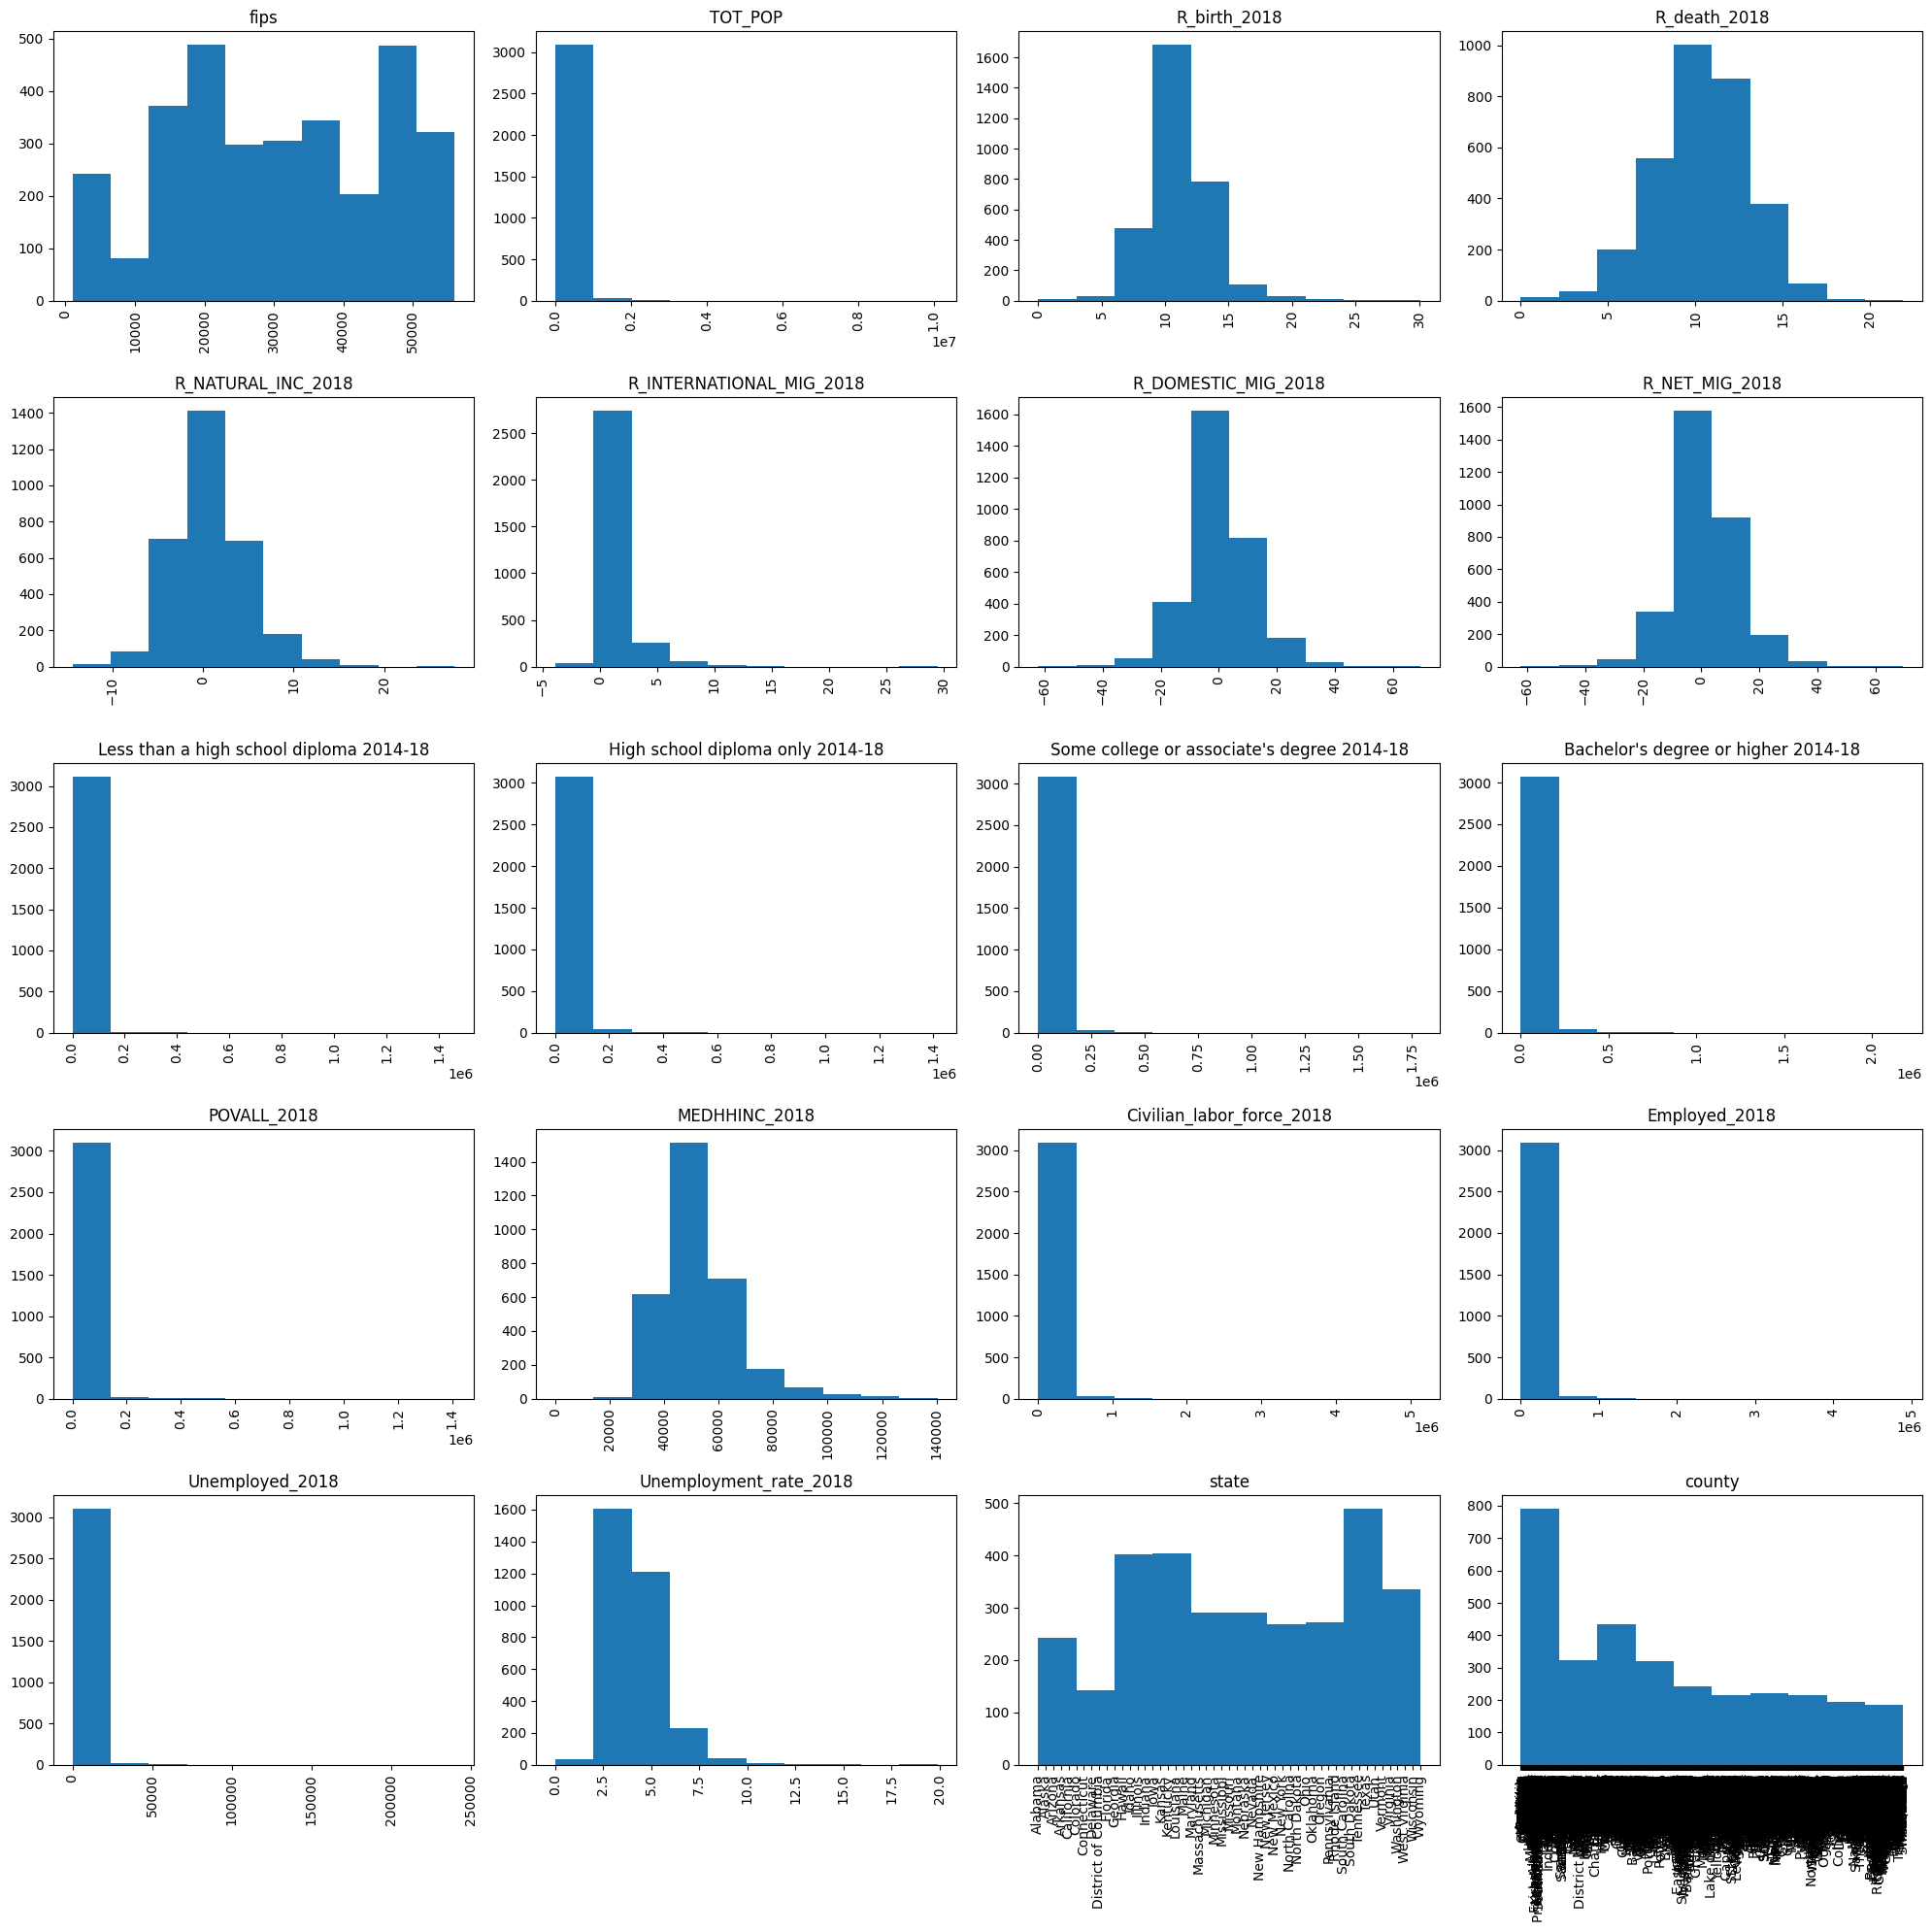

In [17]:
# Visualize the histograms of the sociodemographic columns
plt.figure(figsize=(20, 20))

for i, col in enumerate(sociodemographic.columns):
    plt.subplot(5, 4, i+1)
    plt.hist(sociodemographic[col])
    plt.title(col)
    plt.xticks(rotation=90)
    plt.tight_layout()
plt.show()


#### **Part 2: Health resource data**

In [18]:
# Select the health resources data
health_resources = resource_data.iloc[:, 62:75]
health_resources

,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x
0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6
1,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51
2,217.1,196.7,77.2,71.2,7.6,6.9,12.914231,2.723340,0.514126,11.631462,9.508784,32.283033,5
3,217.1,196.7,77.2,71.2,7.6,6.9,11.626493,2.451783,0.462860,10.471635,8.560619,29.063942,0
4,217.1,196.7,77.2,71.2,7.6,6.9,30.021267,6.330854,1.195171,27.039257,22.104740,75.047251,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,207.9,199.6,79.8,76.2,10.6,10.4,21.311749,11.997173,2.160982,9.836192,28.018244,40.537033,10
3136,207.9,199.6,79.8,76.2,10.6,10.4,11.425901,6.432063,1.158570,5.273493,15.021465,21.733183,6
3137,207.9,199.6,79.8,76.2,10.6,10.4,10.048714,5.656794,1.018926,4.637868,13.210897,19.113638,6
3138,207.9,199.6,79.8,76.2,10.6,10.4,3.903350,2.197341,0.395794,1.801546,5.131678,7.424555,0


In [19]:
# Dataframe info
health_resources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 13 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Active Physicians per 100000 Population 2018 (AAMC)                            3140 non-null   float64
 1   Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)         3140 non-null   float64
 2   Active Primary Care Physicians per 100000 Population 2018 (AAMC)               3140 non-null   float64
 3   Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)  3140 non-null   float64
 4   Active General Surgeons per 100000 Population 2018 (AAMC)                      3140 non-null   float64
 5   Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)         3140 non-null   float64
 6   Total nurse practitioner

In [20]:
# Dataframe null values
health_resources.isnull().sum()

Active Physicians per 100000 Population 2018 (AAMC)                              0
Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)           0
Active Primary Care Physicians per 100000 Population 2018 (AAMC)                 0
Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)    0
Active General Surgeons per 100000 Population 2018 (AAMC)                        0
Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)           0
Total nurse practitioners (2019)                                                 0
Total physician assistants (2019)                                                0
Total Hospitals (2019)                                                           0
Internal Medicine Primary Care (2019)                                            0
Family Medicine/General Practice Primary Care (2019)                             0
Total Specialist Physicians (2019)                                               0
ICU 

In [21]:
# Duplicate values
health_resources.duplicated().sum()

4

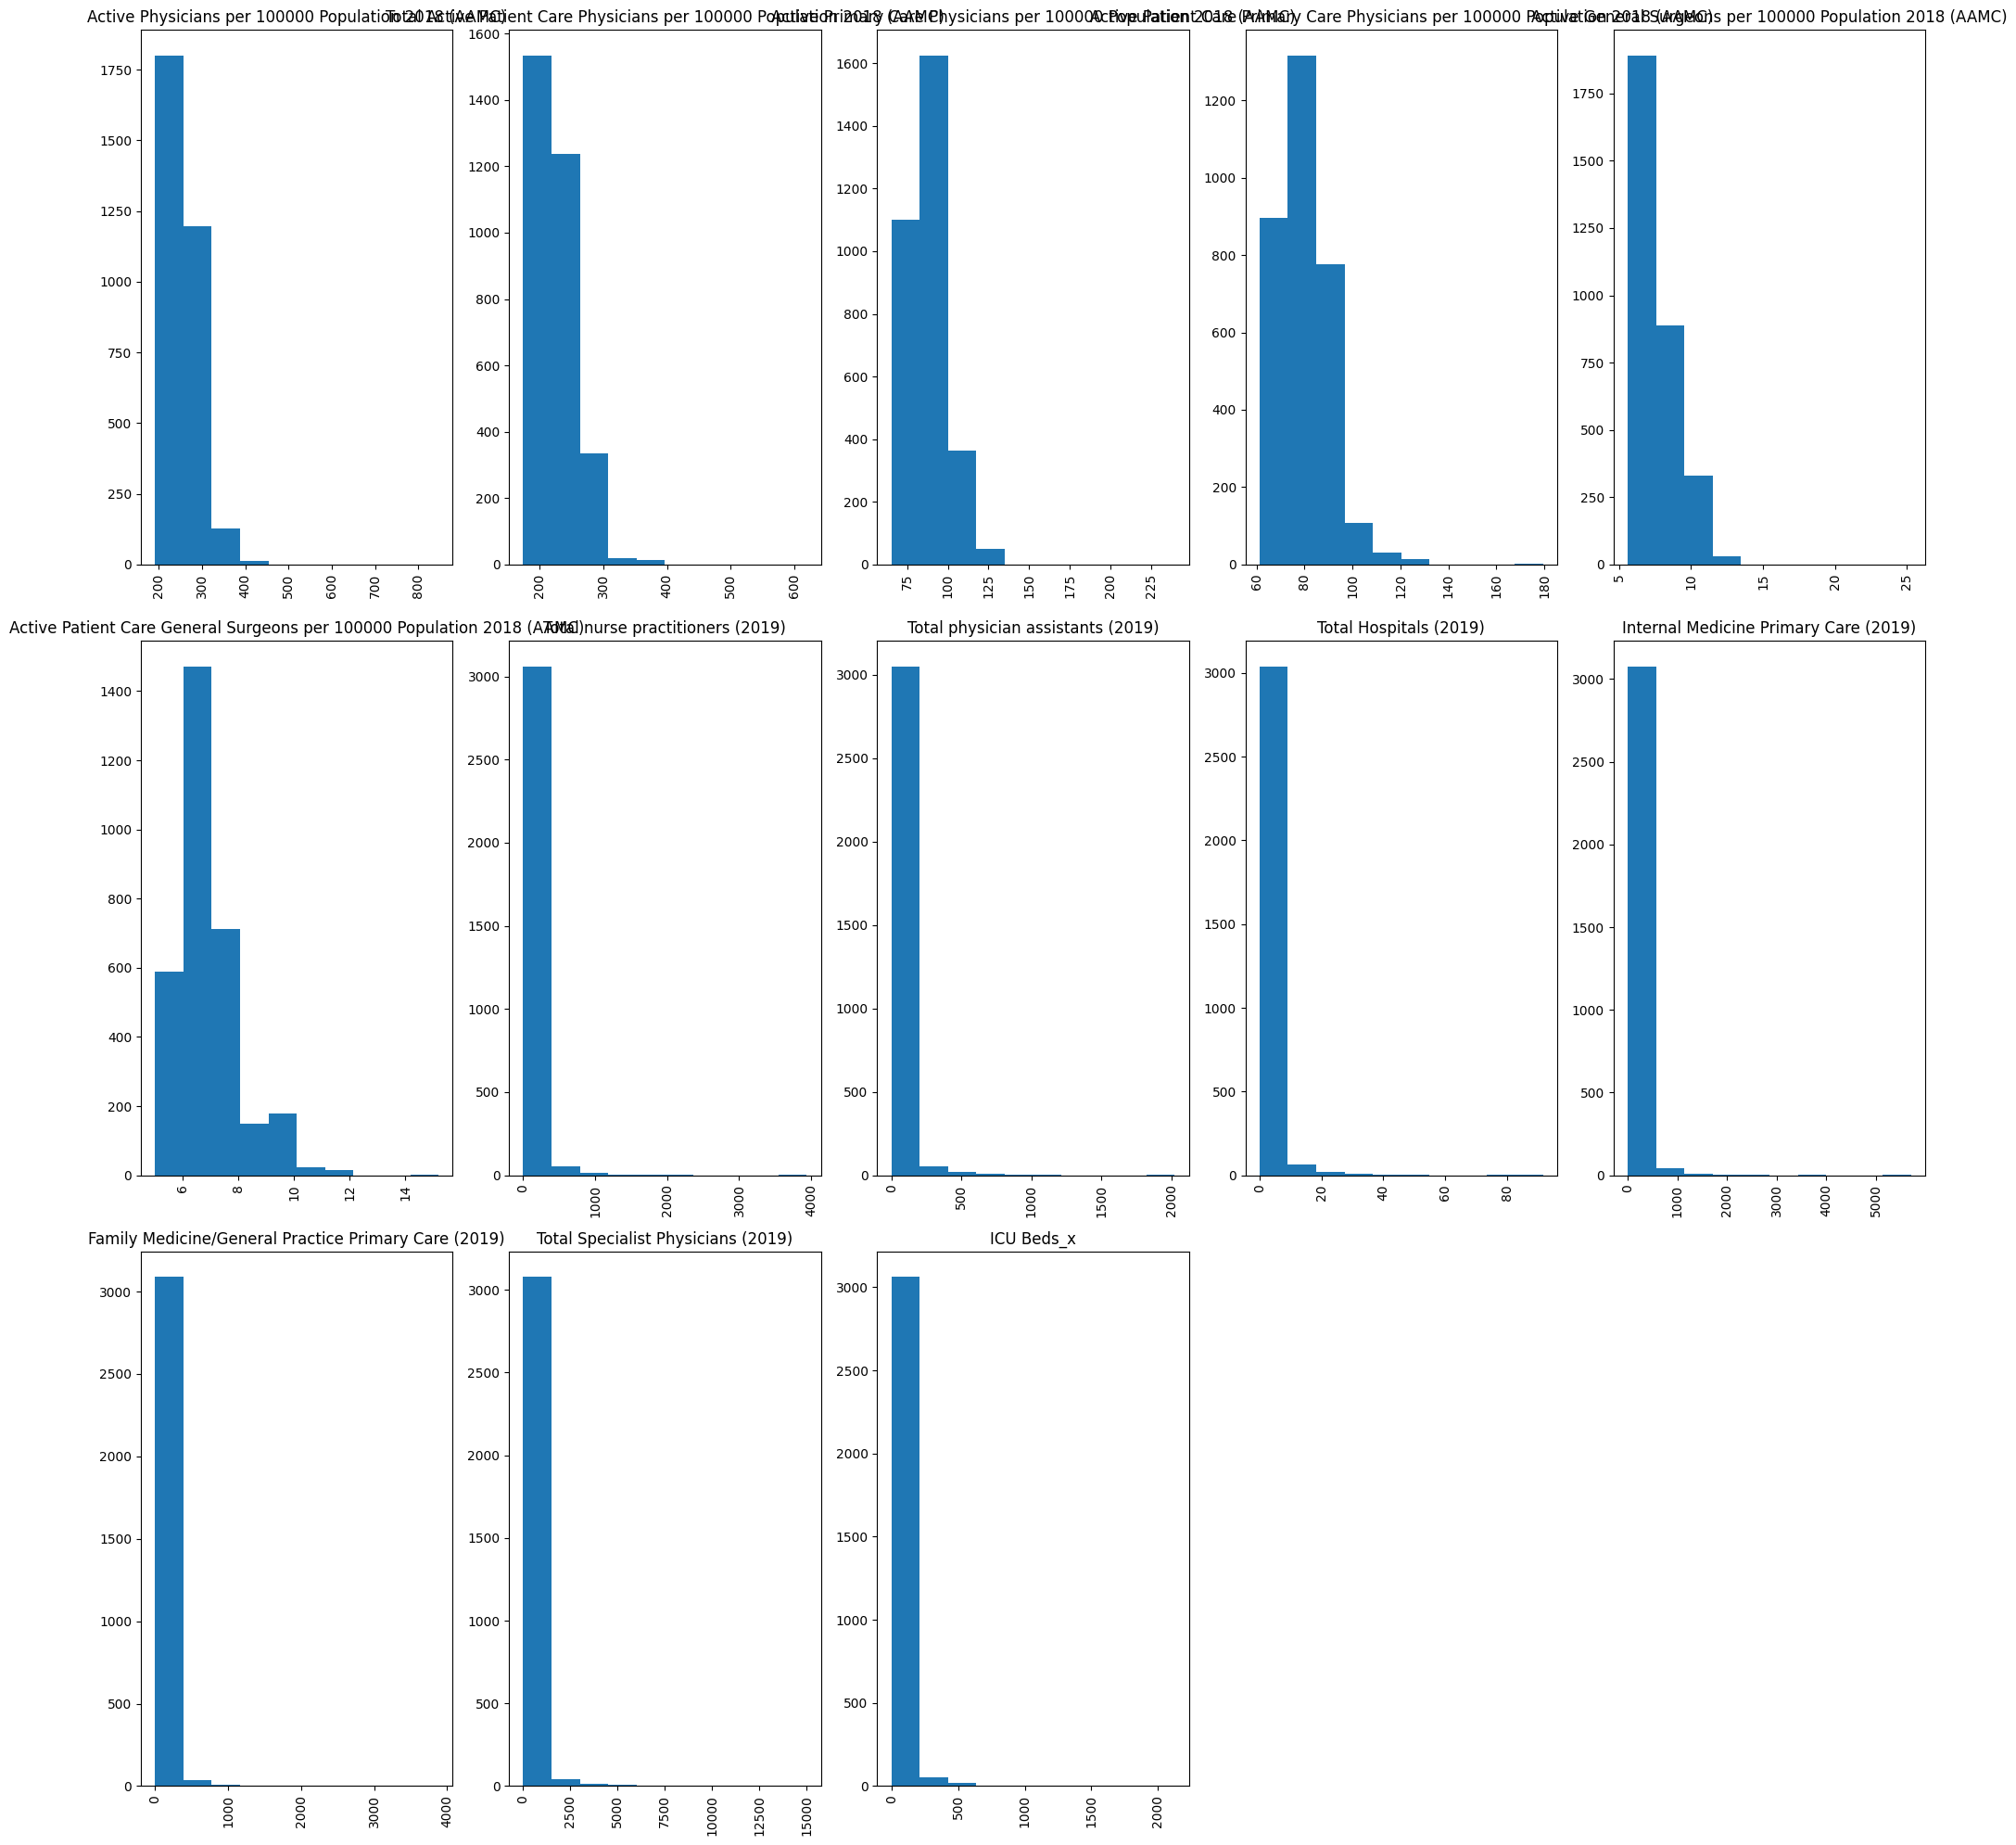

In [22]:
# Visualize the histograms of the health resources columns
plt.figure(figsize=(20, 20))

for i, col in enumerate(health_resources.columns):
    plt.subplot(3, 5, i+1)
    plt.hist(health_resources[col])
    plt.title(col)
    plt.xticks(rotation=90)
    plt.tight_layout()

#### **Part 3: Target variable**

In [23]:
# Select the target column
target = resource_data[['diabetes_number']]
target

,diabetes_number
0,5462
1,20520
2,3870
3,2511
4,6017
...,...
3135,2834
3136,1360
3137,1500
3138,686


#### **Part 4: Joining all the parts together**

In [24]:
# Join the dataframes
total_data = pd.concat([sociodemographic, health_resources, target], axis=1)
total_data

,fips,TOT_POP,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,...,Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,diabetes_number
0,1001,55601,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,...,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,5462
1,1003,218022,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,...,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,20520
2,1005,24881,10.4,12.9,-2.5,0.5,-9.1,-8.6,4901,6486,...,7.6,6.9,12.914231,2.723340,0.514126,11.631462,9.508784,32.283033,5,3870
3,1007,22400,11.1,11.4,-0.3,0.4,-7.0,-6.6,2650,7471,...,7.6,6.9,11.626493,2.451783,0.462860,10.471635,8.560619,29.063942,0,2511
4,1009,57840,11.8,11.4,0.3,0.1,-0.2,0.0,7861,13489,...,7.6,6.9,30.021267,6.330854,1.195171,27.039257,22.104740,75.047251,6,6017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,12.6,7.0,5.6,1.4,-18.5,-17.2,2549,9433,...,10.6,10.4,21.311749,11.997173,2.160982,9.836192,28.018244,40.537033,10,2834
3136,56039,23081,9.9,3.2,6.7,1.6,-16.2,-14.5,958,2272,...,10.6,10.4,11.425901,6.432063,1.158570,5.273493,15.021465,21.733183,6,1360
3137,56041,20299,13.5,7.2,6.3,0.0,-14.0,-14.1,934,5176,...,10.6,10.4,10.048714,5.656794,1.018926,4.637868,13.210897,19.113638,6,1500
3138,56043,7885,9.3,10.7,-1.4,-0.6,-16.6,-17.2,590,1717,...,10.6,10.4,3.903350,2.197341,0.395794,1.801546,5.131678,7.424555,0,686


#### **Part 5: Correlation matrix**

In [25]:
# Convert the categorical columns into numerical columns using factorize
total_data['state'] = pd.factorize(total_data['state'])[0]
total_data['county'] = pd.factorize(total_data['county'])[0]

# Correlation the data with the target column
corr = total_data.corr()['diabetes_number']
corr.sort_values(ascending=False)

diabetes_number                                                                  1.000000
TOT_POP                                                                          0.989583
High school diploma only 2014-18                                                 0.985624
Unemployed_2018                                                                  0.984687
Civilian_labor_force_2018                                                        0.983235
Employed_2018                                                                    0.982331
Some college or associate's degree 2014-18                                       0.980876
POVALL_2018                                                                      0.979848
Family Medicine/General Practice Primary Care (2019)                             0.966274
Less than a high school diploma 2014-18                                          0.965918
Total nurse practitioners (2019)                                                 0.951672
Total Spec

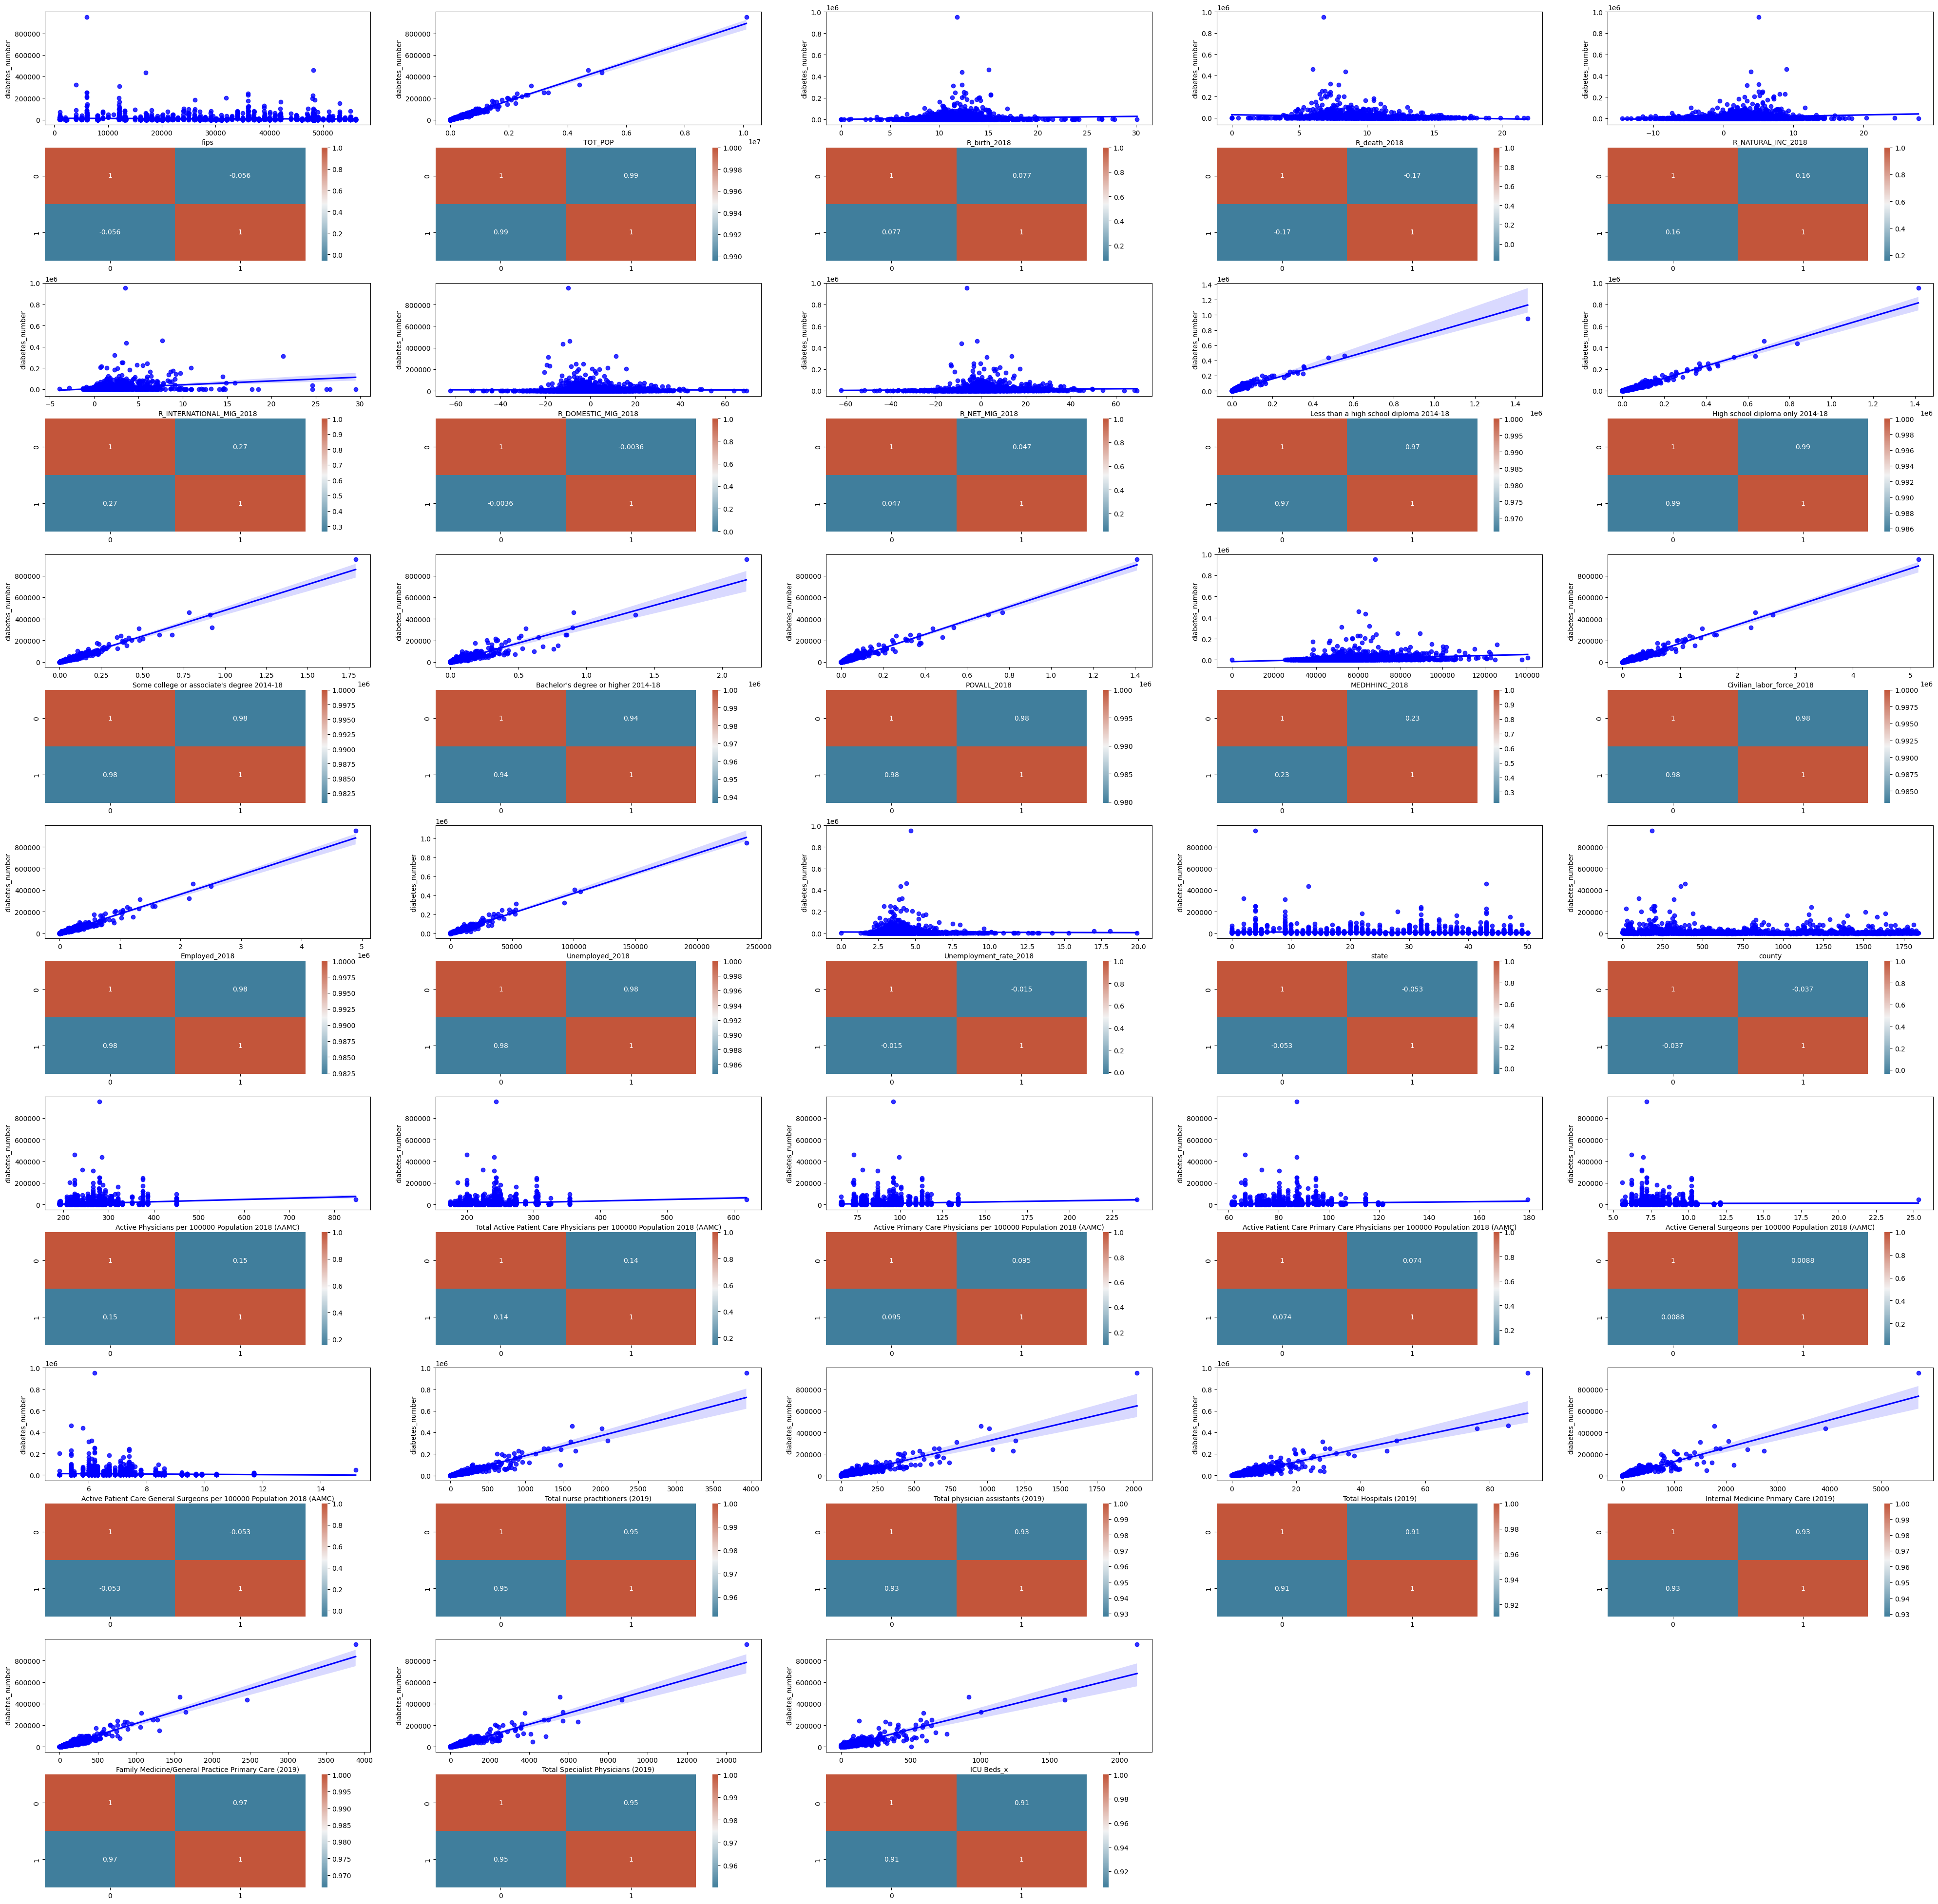

In [26]:
# Create a reglot and heatmap to visualize the correlation between variables
fig, ax = plt.subplots(14, 5, figsize=(50, 50))

# Define the colors
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.regplot(ax=ax[0, 0], x = 'fips', y = 'diabetes_number', data = total_data, color='blue')
sns.heatmap(ax=ax[1, 0], data = total_data[['fips', 'diabetes_number']].corr().values, annot=True, cmap=cmap)
sns.regplot(ax=ax[0, 1], x = 'TOT_POP', y = 'diabetes_number', data = total_data, color='blue')
sns.heatmap(ax=ax[1, 1], data = total_data[['TOT_POP', 'diabetes_number']].corr().values, annot=True, cmap=cmap)
sns.regplot(ax=ax[0, 2], x = 'R_birth_2018', y = 'diabetes_number', data = total_data, color='blue')
sns.heatmap(ax=ax[1, 2], data = total_data[['R_birth_2018', 'diabetes_number']].corr().values, annot=True, cmap=cmap)
sns.regplot(ax=ax[0, 3], x = 'R_death_2018', y = 'diabetes_number', data = total_data, color='blue')
sns.heatmap(ax=ax[1, 3], data = total_data[['R_death_2018', 'diabetes_number']].corr().values, annot=True, cmap=cmap)
sns.regplot(ax=ax[0, 4], x = 'R_NATURAL_INC_2018', y = 'diabetes_number', data = total_data, color='blue')
sns.heatmap(ax=ax[1, 4], data = total_data[['R_NATURAL_INC_2018', 'diabetes_number']].corr().values, annot=True, cmap=cmap)
sns.regplot(ax=ax[2, 0], x = 'R_INTERNATIONAL_MIG_2018', y = 'diabetes_number', data = total_data, color='blue')
sns.heatmap(ax=ax[3, 0], data = total_data[['R_INTERNATIONAL_MIG_2018', 'diabetes_number']].corr().values, annot=True, cmap=cmap)
sns.regplot(ax=ax[2, 1], x = 'R_DOMESTIC_MIG_2018', y = 'diabetes_number', data = total_data, color='blue')
sns.heatmap(ax=ax[3, 1], data = total_data[['R_DOMESTIC_MIG_2018', 'diabetes_number']].corr().values, annot=True, cmap=cmap)
sns.regplot(ax=ax[2, 2], x = 'R_NET_MIG_2018', y = 'diabetes_number', data = total_data, color='blue')
sns.heatmap(ax=ax[3, 2], data = total_data[['R_NET_MIG_2018', 'diabetes_number']].corr().values, annot=True, cmap=cmap)
sns.regplot(ax=ax[2, 3], x = 'Less than a high school diploma 2014-18', y = 'diabetes_number', data = total_data, color='blue')
sns.heatmap(ax=ax[3, 3], data = total_data[['Less than a high school diploma 2014-18', 'diabetes_number']].corr().values, annot=True, cmap=cmap)
sns.regplot(ax=ax[2, 4], x = 'High school diploma only 2014-18', y = 'diabetes_number', data = total_data, color='blue')
sns.heatmap(ax=ax[3, 4], data = total_data[['High school diploma only 2014-18', 'diabetes_number']].corr().values, annot=True, cmap=cmap)
sns.regplot(ax=ax[4, 0], x = "Some college or associate's degree 2014-18", y = 'diabetes_number', data = total_data, color='blue')
sns.heatmap(ax=ax[5, 0], data = total_data[["Some college or associate's degree 2014-18", 'diabetes_number']].corr().values, annot=True, cmap=cmap)
sns.regplot(ax=ax[4, 1], x = "Bachelor's degree or higher 2014-18", y = 'diabetes_number', data = total_data, color='blue')
sns.heatmap(ax=ax[5, 1], data = total_data[["Bachelor's degree or higher 2014-18", 'diabetes_number']].corr().values, annot=True, cmap=cmap)
sns.regplot(ax=ax[4, 2], x = 'POVALL_2018', y = 'diabetes_number', data = total_data, color='blue')
sns.heatmap(ax=ax[5, 2], data = total_data[['POVALL_2018', 'diabetes_number']].corr().values, annot=True, cmap=cmap)
sns.regplot(ax=ax[4, 3], x = 'MEDHHINC_2018', y = 'diabetes_number', data = total_data, color='blue')
sns.heatmap(ax=ax[5, 3], data = total_data[['MEDHHINC_2018', 'diabetes_number']].corr().values, annot=True, cmap=cmap)
sns.regplot(ax=ax[4, 4], x = 'Civilian_labor_force_2018', y = 'diabetes_number', data = total_data, color='blue')
sns.heatmap(ax=ax[5, 4], data = total_data[['Civilian_labor_force_2018', 'diabetes_number']].corr().values, annot=True, cmap=cmap)
sns.regplot(ax=ax[6, 0], x = 'Employed_2018', y = 'diabetes_number', data = total_data, color='blue')
sns.heatmap(ax=ax[7, 0], data = total_data[['Employed_2018', 'diabetes_number']].corr().values, annot=True, cmap=cmap)
sns.regplot(ax=ax[6, 1], x = 'Unemployed_2018', y = 'diabetes_number', data = total_data, color='blue')
sns.heatmap(ax=ax[7, 1], data = total_data[['Unemployed_2018', 'diabetes_number']].corr().values, annot=True, cmap=cmap)
sns.regplot(ax=ax[6, 2], x = 'Unemployment_rate_2018', y = 'diabetes_number', data = total_data, color='blue')
sns.heatmap(ax=ax[7, 2], data = total_data[['Unemployment_rate_2018', 'diabetes_number']].corr().values, annot=True, cmap=cmap)
sns.regplot(ax=ax[6, 3], x = 'state', y = 'diabetes_number', data = total_data, color='blue')
sns.heatmap(ax=ax[7, 3], data = total_data[['state', 'diabetes_number']].corr().values, annot=True, cmap=cmap)
sns.regplot(ax=ax[6, 4], x = 'county', y = 'diabetes_number', data = total_data, color='blue')
sns.heatmap(ax=ax[7, 4], data = total_data[['county', 'diabetes_number']].corr().values, annot=True, cmap=cmap)
sns.regplot(ax=ax[8, 0], x = 'Active Physicians per 100000 Population 2018 (AAMC)', y = 'diabetes_number', data = total_data, color='blue')
sns.heatmap(ax=ax[9, 0], data = total_data[['Active Physicians per 100000 Population 2018 (AAMC)', 'diabetes_number']].corr().values, annot=True, cmap=cmap)
sns.regplot(ax=ax[8, 1], x = 'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)', y = 'diabetes_number', data = total_data, color='blue')
sns.heatmap(ax=ax[9, 1], data = total_data[['Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)', 'diabetes_number']].corr().values, annot=True, cmap=cmap)
sns.regplot(ax=ax[8, 2], x = 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)', y = 'diabetes_number', data = total_data, color='blue')
sns.heatmap(ax=ax[9, 2], data = total_data[['Active Primary Care Physicians per 100000 Population 2018 (AAMC)', 'diabetes_number']].corr().values, annot=True, cmap=cmap)
sns.regplot(ax=ax[8, 3], x = 'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)', y = 'diabetes_number', data = total_data, color='blue')
sns.heatmap(ax=ax[9, 3], data = total_data[['Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)', 'diabetes_number']].corr().values, annot=True, cmap=cmap)
sns.regplot(ax=ax[8, 4], x = 'Active General Surgeons per 100000 Population 2018 (AAMC)', y = 'diabetes_number', data = total_data, color='blue')
sns.heatmap(ax=ax[9, 4], data = total_data[['Active General Surgeons per 100000 Population 2018 (AAMC)', 'diabetes_number']].corr().values, annot=True, cmap=cmap)
sns.regplot(ax=ax[10, 0], x = 'Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)', y = 'diabetes_number', data = total_data, color='blue')
sns.heatmap(ax=ax[11, 0], data = total_data[['Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)', 'diabetes_number']].corr().values, annot=True, cmap=cmap)
sns.regplot(ax=ax[10, 1], x = 'Total nurse practitioners (2019)', y = 'diabetes_number', data = total_data, color='blue')
sns.heatmap(ax=ax[11, 1], data = total_data[['Total nurse practitioners (2019)', 'diabetes_number']].corr().values, annot=True, cmap=cmap)
sns.regplot(ax=ax[10, 2], x = 'Total physician assistants (2019)', y = 'diabetes_number', data = total_data, color='blue')
sns.heatmap(ax=ax[11, 2], data = total_data[['Total physician assistants (2019)', 'diabetes_number']].corr().values, annot=True, cmap=cmap)
sns.regplot(ax=ax[10, 3], x = 'Total Hospitals (2019)', y = 'diabetes_number', data = total_data, color='blue')
sns.heatmap(ax=ax[11, 3], data = total_data[['Total Hospitals (2019)', 'diabetes_number']].corr().values, annot=True, cmap=cmap)
sns.regplot(ax=ax[10, 4], x = 'Internal Medicine Primary Care (2019)', y = 'diabetes_number', data = total_data, color='blue')
sns.heatmap(ax=ax[11, 4], data = total_data[['Internal Medicine Primary Care (2019)', 'diabetes_number']].corr().values, annot=True, cmap=cmap)
sns.regplot(ax=ax[12, 0], x = 'Family Medicine/General Practice Primary Care (2019)', y = 'diabetes_number', data = total_data, color='blue')
sns.heatmap(ax=ax[13, 0], data = total_data[['Family Medicine/General Practice Primary Care (2019)', 'diabetes_number']].corr().values, annot=True, cmap=cmap)
sns.regplot(ax=ax[12, 1], x = 'Total Specialist Physicians (2019)', y = 'diabetes_number', data = total_data, color='blue')
sns.heatmap(ax=ax[13, 1], data = total_data[['Total Specialist Physicians (2019)', 'diabetes_number']].corr().values, annot=True, cmap=cmap)
sns.regplot(ax=ax[12, 2], x = 'ICU Beds_x', y = 'diabetes_number', data = total_data, color='blue')
sns.heatmap(ax=ax[13, 2], data = total_data[['ICU Beds_x', 'diabetes_number']].corr().values, annot=True, cmap=cmap)

# Delete the columns that are not needed
plt.delaxes(ax[12, 3])
plt.delaxes(ax[12, 4])
plt.delaxes(ax[13, 3])
plt.delaxes(ax[13, 4])

plt.show()

In [27]:
# Feature Engineering
# Select the columns that have a correlation greater than 0.5
columns_selected = [
    'TOT_POP', 'High school diploma only 2014-18', 'Unemployed_2018', 'Civilian_labor_force_2018', 'Employed_2018', "Some college or associate's degree 2014-18",
    'POVALL_2018', 'Family Medicine/General Practice Primary Care (2019)', 'Less than a high school diploma 2014-18', 'Total nurse practitioners (2019)', 'Total Specialist Physicians (2019)',
    "Bachelor's degree or higher 2014-18", 'Internal Medicine Primary Care (2019)', 'Total physician assistants (2019)', 'Total Hospitals (2019)', 'ICU Beds_x', 'diabetes_number'
]

# Create the scaler object
scaler = MinMaxScaler()

# Scale the data
scaled_features = scaler.fit_transform(total_data[columns_selected])
diabetes_prediction = pd.DataFrame(scaled_features, columns=columns_selected)
diabetes_prediction

,TOT_POP,High school diploma only 2014-18,Unemployed_2018,Civilian_labor_force_2018,Employed_2018,Some college or associate's degree 2014-18,POVALL_2018,Family Medicine/General Practice Primary Care (2019),Less than a high school diploma 2014-18,Total nurse practitioners (2019),Total Specialist Physicians (2019),Bachelor's degree or higher 2014-18,Internal Medicine Primary Care (2019),Total physician assistants (2019),Total Hospitals (2019),ICU Beds_x,diabetes_number
0,0.005493,0.008545,0.003928,0.005054,0.005109,0.005879,0.005384,0.005465,0.002875,0.007322,0.004798,0.004726,0.004542,0.003004,0.012513,0.002822,0.005724
1,0.021566,0.028637,0.014148,0.018272,0.018474,0.025688,0.014952,0.021453,0.009794,0.028731,0.018834,0.021160,0.017832,0.011794,0.049107,0.023989,0.021536
2,0.002453,0.004568,0.001805,0.001630,0.001622,0.002536,0.004817,0.002441,0.003352,0.003273,0.002143,0.001020,0.002028,0.001342,0.005591,0.002352,0.004052
3,0.002208,0.005264,0.001434,0.001686,0.001699,0.002134,0.003122,0.002197,0.001811,0.002946,0.001928,0.000833,0.001825,0.001207,0.005032,0.000000,0.002625
4,0.005715,0.009512,0.003661,0.004868,0.004928,0.007395,0.005341,0.005686,0.005379,0.007617,0.004991,0.002301,0.004725,0.003125,0.013017,0.002822,0.006307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,0.004251,0.006649,0.003736,0.004118,0.004136,0.005631,0.002512,0.007209,0.001742,0.005406,0.002693,0.002867,0.001714,0.005927,0.023548,0.004704,0.002964
3136,0.002275,0.001593,0.001935,0.002987,0.003038,0.002269,0.001024,0.003861,0.000653,0.002895,0.001440,0.004522,0.000915,0.003175,0.012618,0.002822,0.001417
3137,0.002000,0.003644,0.001626,0.001739,0.001744,0.002673,0.001426,0.003395,0.000637,0.002545,0.001266,0.000916,0.000804,0.002792,0.011095,0.002822,0.001564
3138,0.000772,0.001202,0.000717,0.000790,0.000794,0.001179,0.000651,0.001314,0.000401,0.000985,0.000487,0.000560,0.000307,0.001082,0.004301,0.000000,0.000709


In [28]:
# Feature selection
# Separte the data into features and target
X = diabetes_prediction.drop(['diabetes_number'], axis=1)
y = diabetes_prediction['diabetes_number']

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
train_indices = list(X_train.index)
test_indices = list(X_test.index)

# Select the best features with SelectKBest
best_features = SelectKBest(score_func=f_regression, k=10)
fit = best_features.fit(X_train, y_train)
ix = fit.get_support()

# Create a dataframe with the best features
X_train = pd.DataFrame(best_features.transform(X_train), index = train_indices, columns=X_train.columns.values[ix])
X_test = pd.DataFrame(best_features.transform(X_test), index = test_indices, columns=X_test.columns.values[ix])

# Display the dataframe
X_train

,TOT_POP,High school diploma only 2014-18,Unemployed_2018,Civilian_labor_force_2018,Employed_2018,Some college or associate's degree 2014-18,POVALL_2018,Family Medicine/General Practice Primary Care (2019),Less than a high school diploma 2014-18,Total nurse practitioners (2019)
620,0.003821,0.006359,0.004374,0.003322,0.003271,0.006011,0.005222,0.004728,0.002319,0.003822
1894,0.004650,0.007989,0.003753,0.003843,0.003847,0.006498,0.005982,0.004691,0.002864,0.005425
553,0.000904,0.001743,0.000776,0.000783,0.000783,0.001206,0.000952,0.001241,0.000509,0.000912
2793,0.001520,0.001906,0.001497,0.001120,0.001102,0.001713,0.002426,0.001316,0.000983,0.001492
1554,0.002198,0.003382,0.001301,0.002073,0.002111,0.001803,0.002636,0.002558,0.000639,0.003153
...,...,...,...,...,...,...,...,...,...,...
3092,0.004202,0.005999,0.003365,0.004928,0.005004,0.004940,0.002387,0.006169,0.000931,0.005646
1095,0.005536,0.007481,0.003944,0.005570,0.005649,0.006089,0.003234,0.006129,0.002286,0.009337
1130,0.003301,0.006051,0.002906,0.002348,0.002321,0.002648,0.006208,0.003305,0.003736,0.004302
1294,0.000565,0.001405,0.000688,0.000411,0.000397,0.000933,0.000575,0.000892,0.000246,0.000644


In [29]:
X_test

,TOT_POP,High school diploma only 2014-18,Unemployed_2018,Civilian_labor_force_2018,Employed_2018,Some college or associate's degree 2014-18,POVALL_2018,Family Medicine/General Practice Primary Care (2019),Less than a high school diploma 2014-18,Total nurse practitioners (2019)
2893,0.000886,0.001825,0.000517,0.000787,0.000800,0.001030,0.000830,0.001011,0.000804,0.001200
2968,0.026690,0.028974,0.023821,0.023925,0.023930,0.040065,0.016757,0.040725,0.006947,0.027608
1064,0.001714,0.003721,0.001226,0.000906,0.000890,0.001709,0.003743,0.001899,0.002151,0.002896
1231,0.011602,0.020791,0.008477,0.012117,0.012296,0.013094,0.008820,0.018201,0.004980,0.013169
2987,0.022324,0.023486,0.022078,0.021741,0.021725,0.027918,0.023243,0.034064,0.007531,0.023092
...,...,...,...,...,...,...,...,...,...,...
2387,0.000596,0.001085,0.000417,0.000631,0.000642,0.000575,0.000390,0.000957,0.000216,0.000826
1321,0.010238,0.008697,0.005929,0.011265,0.011526,0.010625,0.002800,0.016657,0.001603,0.013491
1187,0.004998,0.010616,0.004591,0.004456,0.004449,0.006513,0.005685,0.010877,0.003096,0.010553
2090,0.022716,0.043994,0.025618,0.020138,0.019870,0.026403,0.025916,0.027346,0.010221,0.030122


In [30]:
# Add the target column to the dataframes
X_train['diabetes_number'] = y_train
X_test['diabetes_number'] = y_test

# Save the train and test dataframes
X_train.to_csv('../data/processed/train.csv', index = False)
X_test.to_csv('../data/processed/test.csv', index = False)

### **Step 3:** Build a Regression Model

In [31]:
# Read the data from file
train_df = pd.read_csv('../data/processed/train.csv')
test_df = pd.read_csv('../data/processed/test.csv')

# Show the first rows of the train dataframe
train_df.head()

,TOT_POP,High school diploma only 2014-18,Unemployed_2018,Civilian_labor_force_2018,Employed_2018,Some college or associate's degree 2014-18,POVALL_2018,Family Medicine/General Practice Primary Care (2019),Less than a high school diploma 2014-18,Total nurse practitioners (2019),diabetes_number
0,0.003821,0.006359,0.004374,0.003322,0.003271,0.006011,0.005222,0.004728,0.002319,0.003822,0.004106
1,0.004650,0.007989,0.003753,0.003843,0.003847,0.006498,0.005982,0.004691,0.002864,0.005425,0.006273
2,0.000904,0.001743,0.000776,0.000783,0.000783,0.001206,0.000952,0.001241,0.000509,0.000912,0.001066
3,0.001520,0.001906,0.001497,0.001120,0.001102,0.001713,0.002426,0.001316,0.000983,0.001492,0.001723
4,0.002198,0.003382,0.001301,0.002073,0.002111,0.001803,0.002636,0.002558,0.000639,0.003153,0.001815


In [32]:
test_df.head()

,TOT_POP,High school diploma only 2014-18,Unemployed_2018,Civilian_labor_force_2018,Employed_2018,Some college or associate's degree 2014-18,POVALL_2018,Family Medicine/General Practice Primary Care (2019),Less than a high school diploma 2014-18,Total nurse practitioners (2019),diabetes_number
0,0.000886,0.001825,0.000517,0.000787,0.000800,0.001030,0.000830,0.001011,0.000804,0.001200,0.001151
1,0.026690,0.028974,0.023821,0.023925,0.023930,0.040065,0.016757,0.040725,0.006947,0.027608,0.022856
2,0.001714,0.003721,0.001226,0.000906,0.000890,0.001709,0.003743,0.001899,0.002151,0.002896,0.002723
3,0.011602,0.020791,0.008477,0.012117,0.012296,0.013094,0.008820,0.018201,0.004980,0.013169,0.009888
4,0.022324,0.023486,0.022078,0.021741,0.021725,0.027918,0.023243,0.034064,0.007531,0.023092,0.017799


In [33]:
# Separate the feature and the target columns
X_train = train_df.drop(columns=['diabetes_number'])
y_train = train_df['diabetes_number']

# Separate the feature and the target columns
X_test = test_df.drop(columns=['diabetes_number'])
y_test = test_df['diabetes_number']

In [34]:
# Create the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [35]:
# Know the parameters of the model
print('Intercept:', linear_model.intercept_)
print('Coefficients:', linear_model.coef_)

Intercept: -3.7629229886157814e-05
Coefficients: [ 2.74847253e-01  3.26006661e-01 -8.57587059e+10  1.83666678e+12
 -1.75090807e+12  2.21918332e-02  1.67774748e-01 -5.44224005e-02
  2.82692086e-01 -5.64138459e-02]


In [36]:
# Predict the values
y_pred = linear_model.predict(X_test)
y_pred

array([0.00110864, 0.01939657, 0.00257165, ..., 0.00571074, 0.02503743,
       0.00885478])

In [50]:
# Evaluate the lineal regression model
score = linear_model.score(X_test, y_test)
print("Coefficients:", linear_model.coef_)
print("R2 score:", score)

Coefficients: [ 2.74847253e-01  3.26006661e-01 -8.57587059e+10  1.83666678e+12
 -1.75090807e+12  2.21918332e-02  1.67774748e-01 -5.44224005e-02
  2.82692086e-01 -5.64138459e-02]
R2 score: 0.9898534342498582


In [51]:
# create a Lasso regressor
lasso_model = Lasso(alpha=1.0, max_iter=300)

# Train the model
lasso_model.fit(X_train, y_train)

# Predict the values
y_pred_2 = lasso_model.predict(X_test)
y_pred_2

array([0.01001885, 0.01001885, 0.01001885, ..., 0.01001885, 0.01001885,
       0.01001885])

In [52]:
# Evaluamos el rendimiento del modelo en los datos de prueba
score = lasso_model.score(X_test, y_test)
print("Coefficients:", lasso_model.coef_)
print("R2 score:", score)

Coefficients: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
R2 score: -0.000963662785715913


### **Step 4:** Optimize the model

In [53]:
# Define the parameters
hyperparameters = {
    'alpha': [0.1, 0.5, 1.0, 10.0, 100.0],
    'max_iter': [100, 200, 300, 400, 500]
}

# Create the grid search
grid = GridSearchCV(lasso_model, hyperparameters, cv=5)
grid

GridSearchCV(cv=5, estimator=Lasso(max_iter=300),
             param_grid={'alpha': [0.1, 0.5, 1.0, 10.0, 100.0],
                         'max_iter': [100, 200, 300, 400, 500]})

In [54]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'alpha': 0.1, 'max_iter': 100}


In [55]:
model_grid = lasso_model.set_params(alpha = 0.1, max_iter = 100)
y_pred_2 = model_grid.predict(X_test)

# Evaluamos el rendimiento del modelo en los datos de prueba
score = model_grid.score(X_test, y_test)
print("Coefficients:", model_grid.coef_)
print("R2 score:", score)

Coefficients: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
R2 score: -0.000963662785715913


In [57]:
# Save the models in a file
dump(linear_model, open('../models/linear_model.pkl', 'wb'))
dump(lasso_model, open('../models/lasso_model.pkl', 'wb'))
dump(model_grid, open('../models/model_grid.pkl', 'wb'))